<a href="https://colab.research.google.com/github/dourivaljunior/projetos-de-casos-reais/blob/main/estudo_caso_real_ponto_ve%C3%ADculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
# from google.colab import files 
# uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv('data.csv',encoding='iso-8859-1')
df['data'] =pd.to_datetime(df['data'])
print(df)
df.info()

In [ ]:
#from datetime import date
data_dia =df['data'].dt.day_name()
#segunda=0,terça=1,quarta=2,quinta=3,sexta=4,sábado=5,domingo=6
print(data_dia)
df221=data_dia
df221=df221.loc[df221=='Saturday']
df221.count()

In [ ]:
# days=['Wednesday','Thrusday','Friday','Saturday','Sunday']
# occur = data_dia.groupby('dia').size()
# occur

In [ ]:
#lendo os arquivos originais

In [ ]:
# df200 = pd.read_csv('2022.CSV',encoding='iso-8859-1')
# df200.info()

In [ ]:
# df201=df200.groupby(['ano','mes']).agg({'c1':'count','c2':'sum'}).reset_index()
# df201

In [ ]:
# filtered_df = df201.query('ano == 2022')
# print(filtered_df)

In [ ]:
# # Criando um gráfico
# x=df201['ano']
# y=df201['c2']
# plt.bar(x,y, label = 'gráfico de Barras', color = 'g')
# plt.legend()
# plt.show()

In [ ]:
cols=['data_compra','data_venda','ano','marca','modelo','valor_compra','valor_venda','codigo','nome_vendedor']
df1 = pd.read_csv('2017_teste.csv',encoding='iso-8859-1')
df1.columns=cols
df2 = pd.read_csv('2018_teste.csv',encoding='iso-8859-1')
df2.columns=cols
df3 = pd.read_csv('2019_teste.csv',encoding='iso-8859-1')
df3.columns=cols
df4 = pd.read_csv('2020_teste.csv',encoding='iso-8859-1')
df4.columns=cols
df5 = pd.read_csv('2021_teste.csv',encoding='iso-8859-1')
df5.columns=cols
df6 = pd.read_csv('2022_teste.csv',encoding='iso-8859-1')
df6.columns=cols

In [ ]:
#criando um arquivo único 

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5,df6],axis=0,ignore_index=True)
df400=pd.concat([df1,df2,df3,df4,df5],axis=0,ignore_index=True)
df400.tail()

In [ ]:
#verificando os dados do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   data_compra    863 non-null    object
 1   data_venda     863 non-null    object
 2   ano            863 non-null    object
 3   marca          863 non-null    object
 4   modelo         863 non-null    object
 5   valor_compra   863 non-null    int64 
 6   valor_venda    863 non-null    int64 
 7   codigo         863 non-null    int64 
 8   nome_vendedor  863 non-null    object
dtypes: int64(3), object(6)
memory usage: 60.8+ KB


In [ ]:
#transformando as datas para o formato correto
df['data_compra'] =pd.to_datetime(df.data_compra,format='%d/%m/%Y')
df['data_venda'] =pd.to_datetime(df.data_venda,format='%d/%m/%Y')
df.tail(10)
df400['data_compra'] =pd.to_datetime(df400.data_compra,format='%d/%m/%Y')
df400['data_venda'] =pd.to_datetime(df400.data_venda,format='%d/%m/%Y')

In [ ]:
# #mudando todas as letras para formato minúsculo nas colunas marca modelo e nome_vendedor
df['marca'] = df['marca'].str.lower()
df['modelo'] = df['modelo'].str.lower()
df['nome_vendedor'] = df['nome_vendedor'].str.lower()
#
df400['marca'] = df400['marca'].str.lower()
df400['modelo'] = df400['modelo'].str.lower()
df400['nome_vendedor'] = df400['nome_vendedor'].str.lower()

In [ ]:
df.tail()

In [ ]:
data=df['data_venda'].dt.day_name()
data.head()

0    Friday
1    Friday
2    Friday
3    Monday
4    Monday
Name: data_venda, dtype: object

In [ ]:
data_dia =df['data_venda'].dt.day_name()
#segunda=0,terça=1,quarta=2,quinta=3,sexta=4,sábado=5,domingo=6
#print(data_dia)
df221=data_dia
df221=df221.loc[df221=='Saturday']
df221.count()

121

In [ ]:
#salvar o arquivo
# saving the pre-processed data
df.to_csv('dados1.csv', index=False)
files.download('dados1.csv')

In [ ]:
#transformando as datas para o formato correto
# df['data_compra'] =pd.to_datetime(df['data_compra'])
# df['data_venda'] =pd.to_datetime(df['data_venda'])

In [ ]:
df.info()

In [ ]:
df['dia_data_venda'] = df['data_venda'].dt.day
df['mes_data_venda'] = df['data_venda'].dt.month 
df['ano_data_venda'] = df['data_venda'].dt.year 
#
df400['dia_data_venda'] = df400['data_venda'].dt.day
df400['mes_data_venda'] = df400['data_venda'].dt.month 
df400['ano_data_venda'] = df400['data_venda'].dt.year

In [ ]:
#criando as colunas lucro absoluto e relativo
#criando a coluna com tempo do veículo no pátio
df['lucro']=df['valor_venda']-df['valor_compra']
df['lucro_perc']=round((df['valor_venda']-df['valor_compra'])/df['valor_compra']*100,1)
df['perc_total_lucro']=round(df['lucro']/(df['lucro'].sum())*100,2)
#filtrando linhas com valores negativos na coluna lucro
df['lucro']=[0 if lucro<=0 else lucro for lucro in df['lucro']]
df['lucro_perc']=[0 if lucro_perc<=0 else lucro_perc for lucro_perc in df['lucro_perc']]
df['perc_total_lucro']=[0 if perc_total_lucro<=0 else perc_total_lucro for perc_total_lucro in df['perc_total_lucro']]
#verificando o tempo de permanência do veiculo no pátio.
df['tempo_patio']=(df['data_venda']-df['data_compra'])
df100=df
df200=df
df300=df
df100.head()

In [ ]:
df400['lucro']=df400['valor_venda']-df400['valor_compra']
df400['lucro_perc']=round((df400['valor_venda']-df400['valor_compra'])/df400['valor_compra']*100,1)
df400['perc_total_lucro']=round(df400['lucro']/(df400['lucro'].sum())*100,2)
#filtrando linhas com valores negativos na coluna lucro
df400['lucro']=[0 if lucro<=0 else lucro for lucro in df400['lucro']]
df400['lucro_perc']=[0 if lucro_perc<=0 else lucro_perc for lucro_perc in df400['lucro_perc']]
df400['perc_total_lucro']=[0 if perc_total_lucro<=0 else perc_total_lucro for perc_total_lucro in df400['perc_total_lucro']]
#verificando o tempo de permanência do veiculo no pátio.
df400['tempo_patio']=(df400['data_venda']-df400['data_compra'])

In [ ]:
df401=df400
df401.head()

In [ ]:
#filtrando os dados por ano
# data de venda 2017
fil_df_2017 = df100.query('ano_data_venda == 2017')
# data de venda 2018
fil_df_2018 = df100.query('ano_data_venda == 2018')
# data de venda 2019
fil_df_2019 = df100.query('ano_data_venda == 2019')
# data de venda 2020
fil_df_2020 = df100.query('ano_data_venda == 2020')
# data de venda 2021
fil_df_2021 = df100.query('ano_data_venda == 2021')
# data de venda 2022
fil_df_2022 = df100.query('ano_data_venda == 2022')
fil_df_2021.head(10)

In [ ]:
#

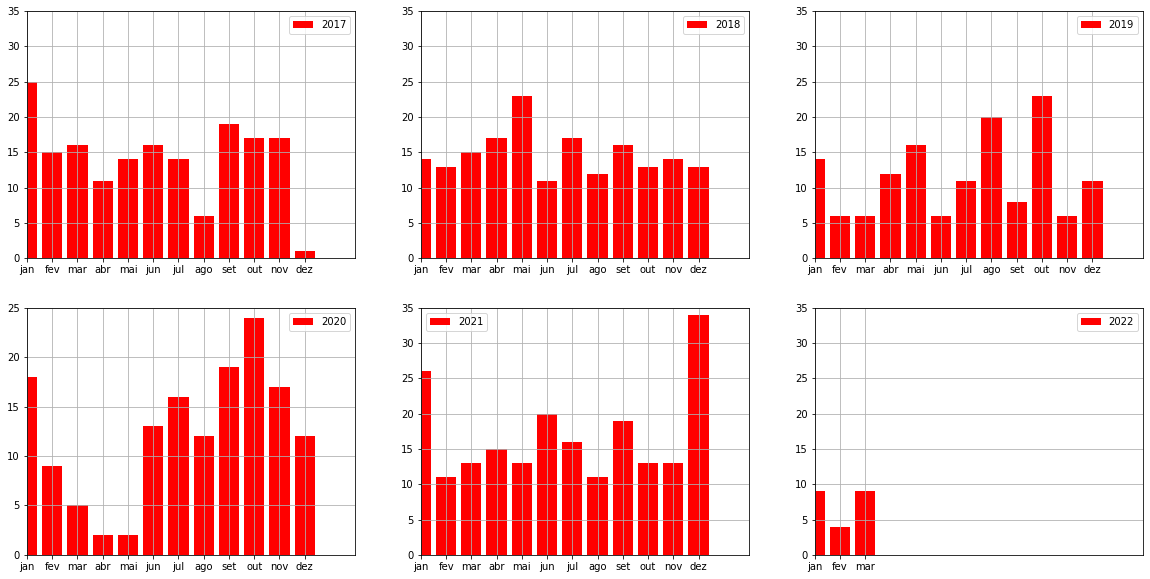

In [ ]:
#agrupando os dados por ano e mês
# df_2017=fil_df_2017.groupby('mes_data_venda').agg({'marca':'count'}).reset_index()
# x1=df_2017['mes_data_venda']
# y1=df_2017['marca']
list_meses={1:'jan',2:'fev',3:'mar',4:'abr',5:'mai',6:'jun',7:'jul',8:'ago',9:'set',10:'out',11:'nov',12:'dez'}
#
df_2017=fil_df_2017.groupby('mes_data_venda').agg({'marca':'count'}).reset_index()
df_2017['mes_data_venda'] = df_2017['mes_data_venda']
x1=df_2017['mes_data_venda'].map(list_meses)
y1=df_2017['marca']
#
df_2018=fil_df_2018.groupby('mes_data_venda').agg({'marca':'count'}).reset_index()
x2=df_2018['mes_data_venda'].map(list_meses)
y2=df_2018['marca']
#
df_2019=fil_df_2019.groupby('mes_data_venda').agg({'marca':'count'}).reset_index()
x3=df_2019['mes_data_venda'].map(list_meses)
y3=df_2019['marca']
#
df_2020=fil_df_2020.groupby('mes_data_venda').agg({'marca':'count'}).reset_index()
x4=df_2020['mes_data_venda'].map(list_meses)
y4=df_2020['marca']
#
df_2021=fil_df_2021.groupby('mes_data_venda').agg({'marca':'count'}).reset_index()
x5=df_2021['mes_data_venda'].map(list_meses)
y5=df_2021['marca']
#
df_2022=fil_df_2022.groupby('mes_data_venda').agg({'marca':'count'}).reset_index()
x6=df_2022['mes_data_venda'].map({1:'jan',2:'fev',3:'mar'})
y6=df_2022['marca']
#
plt.figure(figsize = (20,10))
plt.subplot(2, 3, 1)
plt.bar(x1,y1,label = '2017', color = 'r')
plt.legend()
plt.grid()
plt.xlim(0,13)
plt.ylim(0,35)
plt.subplot(2, 3, 2)
plt.bar(x2,y2,label = '2018', color = 'r')
plt.legend()
plt.grid()
plt.xlim(0,13)
plt.ylim(0,35)
plt.subplot(2, 3, 3)
plt.bar(x3,y3,label = '2019', color = 'r')
plt.legend()
plt.grid()
plt.xlim(0,13)
plt.ylim(0,35)
plt.subplot(2, 3, 4)
plt.bar(x4,y4,label = '2020', color = 'r')
plt.legend()
plt.grid()
plt.xlim(0,13)
plt.ylim(0,25)
plt.subplot(2, 3, 5)
plt.bar(x5,y5,label = '2021', color = 'r')
plt.legend()
plt.grid()
plt.xlim(0,13)
plt.ylim(0,35)
plt.subplot(2, 3, 6)
plt.bar(x6,y6,label = '2022', color = 'r')
plt.legend()
plt.grid()
plt.xlim(0,13)
plt.ylim(0,35)
plt.show()

In [ ]:
#agrupando

In [ ]:
df_2019_quant=fil_df_2019.groupby(['mes_data_venda','ano_data_venda']).agg({'marca':'count'}).reset_index()
df_2019_quant

,mes_data_venda,ano_data_venda,marca
0,1,2019,14
1,2,2019,6
2,3,2019,6
3,4,2019,12
4,5,2019,16
5,6,2019,6
6,7,2019,11
7,8,2019,20
8,9,2019,8
9,10,2019,23


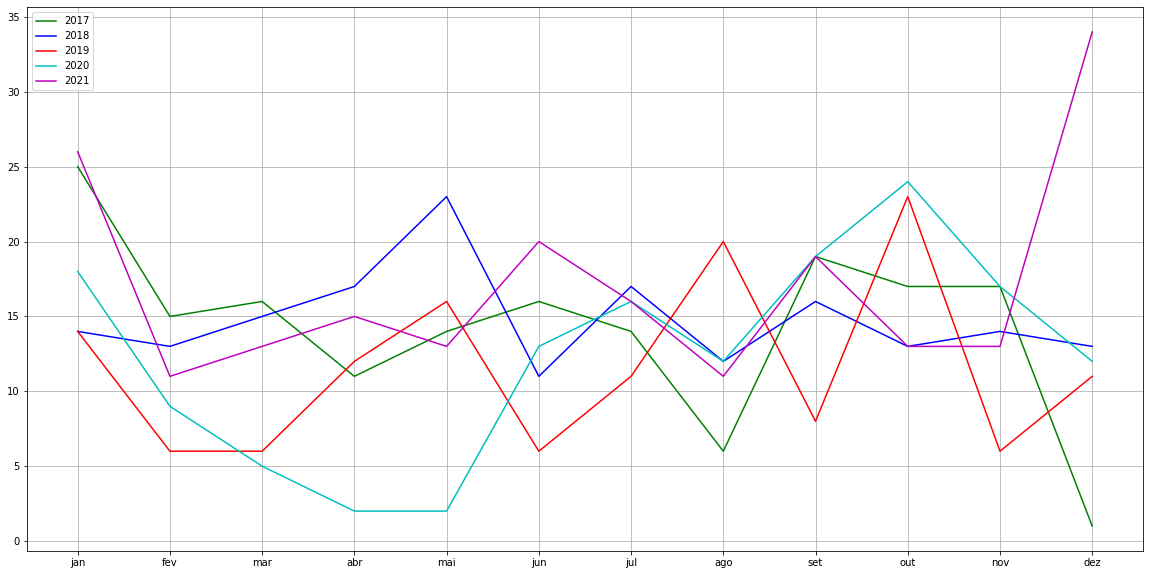

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(x1,y1,label = '2017', color = 'g')
plt.legend()
plt.grid()
plt.plot(x2,y2,label = '2018', color = 'b')
plt.legend()
plt.grid()
plt.plot(x3,y3,label = '2019', color = 'r')
plt.legend()
plt.grid()
plt.plot(x4,y4,label = '2020', color = 'c')
plt.legend()
plt.grid()
plt.plot(x5,y5,label = '2021', color = 'm')
plt.legend()
plt.grid()
# plt.plot(x6,y6,label = '2022', color = 'y')
# plt.legend()
# plt.grid()
plt.show()

In [ ]:
#O gráfico acima mostra que não houve um padrão 'geral' de vendas ao longo dos ano.
#
#df201=df200.groupby(['ano_data_venda','mes_data_venda']).agg({'marca':'count','lucro':'sum'}).reset_index()
df201=df401.groupby('ano_data_venda').agg({'marca':'count','lucro':'sum'}).reset_index()
df201.head(12)

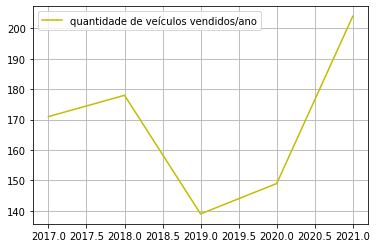

In [ ]:
plt.plot(df201['ano_data_venda'],df201['marca'],label = 'quantidade de veículos vendidos/ano', color = 'y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#salvar o arquivo
# saving the pre-processed data
df.to_csv('dados2.csv', index=False)
files.download('dados2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#

In [ ]:
#começando a extrair informações do dataset
#respondendo as questões de negócio

In [ ]:
#quais veículos (marca/modelo) dão mais lucros
df11=df100.sort_values('lucro_perc',ascending=False,ignore_index=True)
df12=df11.drop(['data_compra','data_venda','ano','codigo','nome_vendedor','ano_data_venda','mes_data_venda','dia_data_venda','valor_compra','valor_venda','lucro','lucro_perc'],axis=1)
df12.head(20)

,marca,modelo,perc_total_lucro,tempo_patio
0,hyundai,grand santa fé 33 automatico,1.12,273 days
1,lifan,x6018vvt,0.20,71 days
2,citroen,c3picassoexclusive16automa,0.16,70 days
3,vw,fox prime 16 i-motion,0.14,394 days
4,ford,fiestasedam10,0.09,97 days
5,renault,logan expression 10,0.11,17 days
6,citroen,aircrosstendance16flex,0.18,112 days
7,suzuki,grandvitara20automatico,0.24,86 days
8,fiat,freemont precision 24 automatico,0.20,83 days
9,nissan,versas10flex,0.13,24 days


In [ ]:
df17=df12.sort_values('tempo_patio',ascending=False)
df17.head(20)

,marca,modelo,perc_total_lucro,tempo_patio
857,kia,sportage lx 20,0.00,1364 days
860,ford,ecosport titanium 20flex automa,0.00,1298 days
861,mitsubishi,asx204x4automatico,0.00,790 days
834,nissan,versa sv 16 automatico,0.04,783 days
152,nissan,sentrasl20automatico,0.14,781 days
355,ssangyong,actyon sport 4x4 20 automatico,0.15,752 days
466,renault,dusterdynamique20automa,0.12,740 days
706,mitsubishi,tr4 hpe 20 flex automatico,0.07,726 days
430,ford,ecosportse15automatico,0.16,700 days
639,gm,onix lt 14 flex automatico,0.07,689 days


In [ ]:
#df14=df12.groupby('marca',sort=False,as_index=False).count()
df14=df12.groupby('marca').agg({'modelo':'count','perc_total_lucro':'sum'})
df15=df14.sort_values('modelo',ascending=False,ignore_index=True)
df15=df15.rename(columns={'modelo':'quantidade'})
df15

,quantidade,perc_total_lucro
0,125,13.61
1,86,8.20
2,86,9.58
3,85,8.73
4,80,7.86
5,78,10.80
6,50,5.94
7,48,5.98
8,41,5.16
9,41,4.92


In [ ]:
#df14=df12.groupby('marca',sort=False,as_index=False).count()
df141=df12.groupby('marca').agg({'perc_total_lucro':'sum'}).sort_values('perc_total_lucro',ascending=False,ignore_index=False).reset_index()
#df152=df141.sort_values('marca',ascending=False,ignore_index=True)
df142=df141.iloc[0:10,0:2]
df142

,marca,perc_total_lucro
0,ford,13.61
1,hyundai,10.80
2,fiat,9.58
3,gm,8.73
4,vw,8.20
5,renault,7.86
6,peugeot,5.98
7,citroen,5.94
8,toyota,5.16
9,honda,4.92


In [ ]:
#agrupando a quantidade de vendas por mês e ano
df14=df12.groupby('marca').agg({'modelo':'count','perc_total_lucro':'sum'}).reset_index()
df14=df14.sort_values('modelo',ascending=False)
df14=df14.iloc[0:10,:].reset_index(drop=True)
df14

,marca,modelo,perc_total_lucro
0,ford,125,13.61
1,vw,86,8.20
2,fiat,86,9.58
3,gm,85,8.73
4,renault,80,7.86
5,hyundai,78,10.80
6,citroen,50,5.94
7,peugeot,48,5.98
8,toyota,41,5.16
9,honda,41,4.92


In [ ]:
LSX=df14['marca']
LSX

0       ford
1         vw
2       fiat
3         gm
4    renault
5    hyundai
6    citroen
7    peugeot
8     toyota
9      honda
Name: marca, dtype: object

In [ ]:
LSY=round(df14['perc_total_lucro'],2)
LSY

0    13.61
1     8.20
2     9.58
3     8.73
4     7.86
5    10.80
6     5.94
7     5.98
8     5.16
9     4.92
Name: perc_total_lucro, dtype: float64

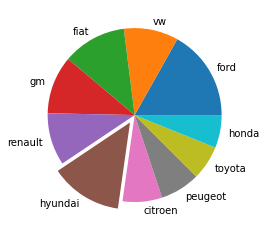

In [ ]:
plt.pie(df14['perc_total_lucro'],labels=df14['marca'],explode=(0,0,0,0,0,0.1,0,0,0,0))
plt.show()

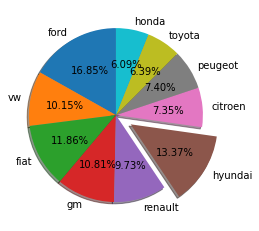

In [ ]:
#fazendo um gráfico de pizza. #vai dar uma pequena diferença pois não considerei todas as 25 marcas , somente ocnsiderei 10.
labels = LSX
sizes = LSY
separate = (0,0,0,0,0,0.2,0,0,0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=separate,labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
plt.show()

In [ ]:
#
list_meses={1:'jan',2:'fev',3:'mar',4:'abr',5:'mai',6:'jun',7:'jul',8:'ago',9:'set',10:'out',11:'nov',12:'dez'}
df_2021=fil_df_2021.groupby('mes_data_venda').agg({'marca':'count'}).reset_index()
df_2021['mes_data_venda'] = df_2021['mes_data_venda'].map(list_meses)
df_2021

,mes_data_venda,marca
0,jan,26
1,fev,11
2,mar,13
3,abr,15
4,mai,13
5,jun,20
6,jul,16
7,ago,11
8,set,19
9,out,13


In [ ]:
#
df_2022=fil_df_2022.groupby('mes_data_venda').agg({'marca':'count'}).reset_index()
df_2022['mes_data_venda'] = df_2022['mes_data_venda'].map({1:'jan',2:'fev',3:'mar'})
x6=df_2022['mes_data_venda']
y6=df_2022['marca']

In [ ]:
df_2022.head()

,mes_data_venda,marca
0,jan,9
1,fev,4
2,mar,9


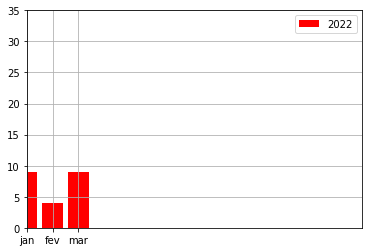

In [ ]:
plt.bar(x6,y6,label = '2022', color = 'r')
#plt.bar(df['Nomes'],df['Idades'])
plt.legend()
plt.grid()
plt.xlim(0,13)
plt.ylim(0,35)
plt.show()

In [ ]:
#fitrando  a quantidade de veículos vendidos por faixa de valores.
faixa1=df100[(df100['valor_venda']>10000)&(df100['valor_venda']<=50000)]
faixa11=faixa1['lucro_perc'].mean()
faixa2=df100[(df100['valor_venda']>50000)&(df100['valor_venda']<=90000)]
faixa21=faixa2['lucro_perc'].mean()
faixa21
faixa3=df100[(df100['valor_venda']>90000)&(df100['valor_venda']<=130000)]
faixa31=faixa3['lucro_perc'].mean()
faixa31
faixa4=df100[(df100['valor_venda']>130000)&(df100['valor_venda']<=170000)]
faixa41=faixa4['lucro_perc'].mean()
faixa5=df100[(df100['valor_venda']>170000)&(df100['valor_venda']<=210000)]
faixa51=faixa5['lucro_perc'].mean()
faixa6=df100[(df100['valor_venda']>210000)]
faixa61=faixa6['lucro_perc'].mean()
faixa6['marca'].count(),faixa61

(1, 18.4)

In [ ]:
faixa3=df100[(df100['valor_venda']>170000)&(df100['valor_venda']<=210000)]
faixa31=faixa3['lucro_perc'].mean()
faixa3.head(20)

In [ ]:
faixa31

14.160000000000002

In [ ]:
y=[faixa11,faixa21,faixa31,faixa41,faixa51,faixa61]
x=['10-50','50-90','90-130','130-170','170-210','210-250']

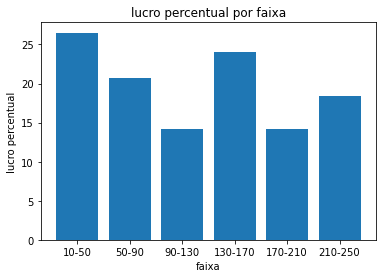

In [ ]:
plt.title('lucro percentual por faixa')
plt.xlabel('faixa')
plt.ylabel('lucro percentual')
plt.bar(x,y)
plt.show()

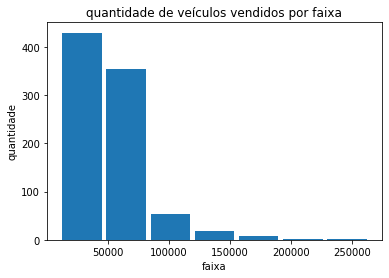

In [ ]:
plt.title('quantidade de veículos vendidos por faixa')
plt.xlabel('faixa')
plt.ylabel('quantidade')
plt.hist(df100['valor_venda'], 7, rwidth=0.9)
plt.show()

In [ ]:
df401.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   data_compra       841 non-null    datetime64[ns] 
 1   data_venda        841 non-null    datetime64[ns] 
 2   ano               841 non-null    object         
 3   marca             841 non-null    object         
 4   modelo            841 non-null    object         
 5   valor_compra      841 non-null    int64          
 6   valor_venda       841 non-null    int64          
 7   codigo            841 non-null    int64          
 8   nome_vendedor     841 non-null    object         
 9   dia_data_venda    841 non-null    int64          
 10  mes_data_venda    841 non-null    int64          
 11  ano_data_venda    841 non-null    int64          
 12  lucro             841 non-null    int64          
 13  lucro_perc        841 non-null    float64        
 14  perc_total

In [ ]:
#analisando o tempo do veículo no pátio
df402=df401.sort_values('tempo_patio',ascending= False)
df402["tempo_patio"] = df402["tempo_patio"].astype('timedelta64[D]').astype(int)
df402.head(100)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


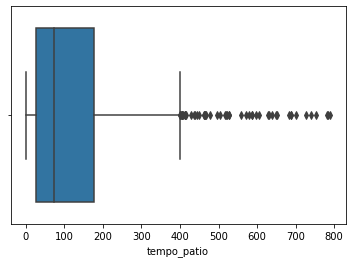

(130.0, 147.0, 74.0)

In [ ]:
#gráfico
df403=df402.iloc[2:,:]
df404=abs(df403['tempo_patio'])
sns.boxplot(df404)
plt.show()
round(df404.mean(),0),round(df404.std(),0),np.median(df404)

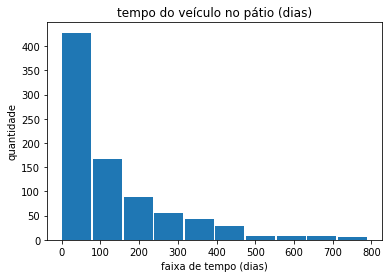

In [ ]:
plt.title('tempo do veículo no pátio (dias)')
plt.xlabel('faixa de tempo (dias)')
plt.ylabel('quantidade')
plt.hist(df404, bins = 10, rwidth=0.95)
plt.show()

In [ ]:
df403.head()

In [ ]:
#quais marcas saem mais rápido 90 dias.
cols2=['data_compra','data_venda','ano','valor_compra','valor_venda','codigo','nome_vendedor','dia_data_venda','mes_data_venda','ano_data_venda']
df404=df403.drop(columns=cols2,axis=1)

In [ ]:
df404.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 584 to 195
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             839 non-null    object 
 1   modelo            839 non-null    object 
 2   lucro             839 non-null    int64  
 3   lucro_perc        839 non-null    float64
 4   perc_total_lucro  839 non-null    float64
 5   tempo_patio       839 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 45.9+ KB


In [ ]:
df405=df404.drop(columns=['lucro','lucro_perc','perc_total_lucro'],axis=1)
df405.head()

,marca,modelo,tempo_patio
584,mitsubishi,asx204x4automatico,790
488,nissan,versa sv 16 automatico,783
654,nissan,sentrasl20automatico,781
170,ssangyong,actyon sport 4x4 20 automatico,752
639,renault,dusterdynamique20automa,740


In [ ]:
tp_1=df405[abs(df405['tempo_patio']).between(0, 90)]
tp_1.groupby('marca').count().sort_values(by='modelo',ascending=False).reset_index()

,marca,modelo,tempo_patio
0,ford,75,75
1,vw,49,49
2,gm,45,45
3,renault,44,44
4,fiat,42,42
5,hyundai,42,42
6,peugeot,29,29
7,honda,26,26
8,citroen,24,24
9,toyota,19,19


In [ ]:
df2 = pd.read_csv('tempo_patio.csv',encoding='iso-8859-1')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   marca        7 non-null      object
 1   tempo_patio  7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [ ]:
df2=df2.sort_values('tempo_patio',ascending= False)
df2

,marca,tempo_patio
6,fiat,150
2,hyundai,60
5,gm,50
1,fiat,40
0,vw,20
4,gm,20
3,fiat,10


In [ ]:
#marca por faixa
#0 a 50
faixa81=df2[(df2['tempo_patio']>100)&(df2['tempo_patio']<=200)]
faixa82=faixa81['marca'].value_counts()
faixa82.head(20)
#50 a 100
#100 a 150

fiat    1
Name: marca, dtype: int64

In [ ]:
df2=df100.sort_values('tempo_patio',ascending= False)
df2
faixa81=df[(df2['tempo_patio']>100)&(df2['tempo_patio']<=200)]
faixa82=faixa81['marca'].value_counts()
#faixa82.head(20)

In [ ]:
#aqui faremos a análise dos dados evoluindo com o tempo.

In [ ]:
!pip install kats

In [ ]:
from kats.consts import TimeSeriesData
df = TimeSeriesData(df)
print(type(df))

<class 'kats.consts.TimeSeriesData'>


In [ ]:
df_from_series = TimeSeriesData(time=df.time, value=df.value)

In [ ]:
df.plot(cols=['lucro'])
plt.xlabel('ano (até junho)', fontsize=15)
plt.ylabel('Quantidade de Veículos Vendidos', fontsize=15)
plt.legend()
plt.show()

In [ ]:
from kats.models.prophet import ProphetModel
from kats.models.prophet import ProphetParams

In [ ]:
params = ProphetParams(seasonality_mode='multiplicative')  #additive
m = ProphetModel(df, params)
m.fit()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = m.predict(steps=7, freq="MS")
forecast.head(7)

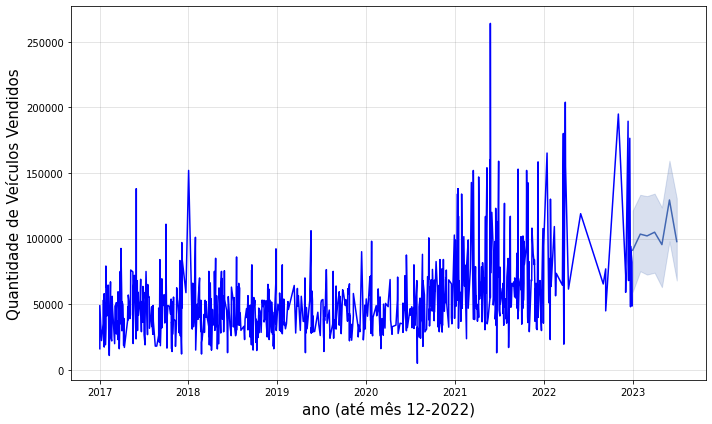

In [ ]:
import matplotlib.pyplot as plt
m.plot(cols=['value'])
x=df.time 
y=df.value
plt.plot(x,y, color = 'b')
plt.xlabel('ano (até mês 12-2022)', fontsize=15)
plt.ylabel('Quantidade de Veículos Vendidos', fontsize=15)
plt.show()

In [ ]:
#fazendo o estudo por groupby